# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [124]:
import matplotlib.pyplot as plt
#can't change font sizes in pie charts = need to change default font size in here
import matplotlib as mpl
import numpy as np
import pandas as pd
import statistics

#numpy stats
import scipy.stats as sts

from datetime import datetime

%matplotlib inline

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [125]:
### Merge the DataFrames

In [126]:
# Combine the data into a single dataset
pyber_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12,46,Urban
5,South Latoya,2019-03-11 12:26,9.52,1.995000e+12,10,Urban
6,New Paulville,2019-02-27 11:17,43.25,7.932080e+11,44,Urban
7,Simpsonburgh,2019-04-26 0:43,35.98,1.119540e+11,21,Urban
8,South Karenland,2019-01-08 3:28,35.09,7.995620e+12,4,Urban
9,North Jasmine,2019-03-09 6:26,42.81,5.327640e+12,33,Urban


## Deliverable 1: Get a Summary DataFrame 

In [127]:
#  1. Get the total rides for each city type
ride_count = pyber_df.groupby("type")
summary_df = ride_count[["ride_id"]].count()

summary_df = summary_df.rename(columns = {"ride_id": "Total Rides"})

In [128]:
# 2. Get the total drivers for each city type
urban_df = pyber_df[pyber_df["type"]=="Urban"]
rural_df = pyber_df[pyber_df["type"]=="Rural"]
suburban_df = pyber_df[pyber_df["type"]=="Suburban"]

urban_driver_count = urban_df.groupby(["city"]).mean()["driver_count"].sum()
rural_driver_count = rural_df.groupby(["city"]).mean()["driver_count"].sum()
suburban_driver_count = suburban_df.groupby(["city"]).mean()["driver_count"].sum()

summary_df["Total Drivers"] = [rural_driver_count, suburban_driver_count, urban_driver_count]

In [129]:
#  3. Get the total amount of fares for each city type
total_fares=pyber_df.groupby("type")
summary_df["Total Fares"] = total_fares[["fare"]].sum()

In [130]:
#  4. Get the average fare per ride for each city type. 
summary_df["Average Fare Per Ride"] = summary_df["Total Fares"]/summary_df["Total Rides"]

In [131]:
# 5. Get the average fare per driver for each city type. 
summary_df["Average Fare Per Driver"] = summary_df["Total Fares"] / summary_df["Total Drivers"]

In [132]:
#  6. Create a PyBer summary DataFrame. 
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [133]:
#  7. Cleaning up the DataFrame. Delete the index name
summary_df.index.name = None
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [134]:
#  8. Format the columns.

summary_df.style.format({"Total Fares": "${:20,.2f}", 
                          "Average Fare Per Ride": "${:20,.2f}", 
                          "Average Fare Per Driver": "${:20,.2f}"})


,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"$ 4,327.93",$ 34.62,$ 55.49
Suburban,625,490,"$ 19,356.33",$ 30.97,$ 39.50
Urban,1625,2405,"$ 39,854.38",$ 24.53,$ 16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [135]:
# 1. Read the merged DataFrame
pyber_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,2019-01-30 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2019-02-10 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,2019-05-07 19:22,44.94,4.256850e+12,4,Rural


In [136]:
pyber_df.dtypes

city             object
date             object
fare            float64
ride_id         float64
driver_count      int64
type             object
dtype: object

In [137]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

# take out the times from the dates
pyber_df['date'] = pyber_df['date'].astype('str')
pyber_df['date'] = pyber_df['date'].str.split(' ',expand=True)
pyber_df

sum_fares_df =pyber_df.groupby(['type','date']).sum()
sum_fares_df


fare       ride_id  driver_count
type  date                                          
Rural 2019-01-01   43.69  2.424880e+12             1
      2019-01-02   52.12  3.454020e+12             1
      2019-01-03   19.90  5.559510e+12             8
      2019-01-04   24.88  4.195620e+12             8
      2019-01-06   47.33  3.849750e+12             4
...                  ...           ...           ...
Urban 2019-05-04  323.57  6.266511e+13           554
      2019-05-05  322.10  6.570873e+13           474
      2019-05-06  181.20  4.186370e+13           227
      2019-05-07  258.01  3.843331e+13           463
      2019-05-08  170.82  2.839734e+13           187

[334 rows x 3 columns]

In [138]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
sum_fares_df = sum_fares_df.reset_index()
sum_fares_df



,type,date,fare,ride_id,driver_count
0,Rural,2019-01-01,43.69,2.424880e+12,1
1,Rural,2019-01-02,52.12,3.454020e+12,1
2,Rural,2019-01-03,19.90,5.559510e+12,8
3,Rural,2019-01-04,24.88,4.195620e+12,8
4,Rural,2019-01-06,47.33,3.849750e+12,4
...,...,...,...,...,...
329,Urban,2019-05-04,323.57,6.266511e+13,554
330,Urban,2019-05-05,322.10,6.570873e+13,474
331,Urban,2019-05-06,181.20,4.186370e+13,227
332,Urban,2019-05-07,258.01,3.843331e+13,463


In [139]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_table_df = pd.pivot_table(sum_fares_df, values='fare', index=['date'],
                    columns=['type'], aggfunc=np.sum)
pivot_table_df

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-05-04,NaN,91.71,323.57
2019-05-05,26.53,154.78,322.10
2019-05-06,111.88,34.12,181.20


In [140]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.                          
pivot_table_df2 = pivot_table_df.loc['2019-01-01':'2019-04-29']
pivot_table_df2

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-04-25,55.84,155.98,419.81
2019-04-26,NaN,132.45,330.98
2019-04-27,52.34,268.25,367.30


In [141]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pivot_table_df2.index = pd.to_datetime(pivot_table_df2.index)

In [142]:
# 7. Check that the datatype for the index is datetime using df.info()
pivot_table_df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 2019-01-01 to 2019-04-29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     74 non-null     float64
 1   Suburban  118 non-null    float64
 2   Urban     119 non-null    float64
dtypes: float64(3)
memory usage: 3.7 KB


In [143]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

weekly_df = pivot_table_df2.resample('W').sum()
weekly_df
weekly_df.drop(weekly_df.tail(1).index,inplace=True)
weekly_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [144]:
rural_data=weekly_df['Rural'].values
suburban_data = weekly_df['Suburban'].values
urban_data=weekly_df['Urban'].values

dates=weekly_df.index.values
dates.dtype

dtype('<M8[ns]')

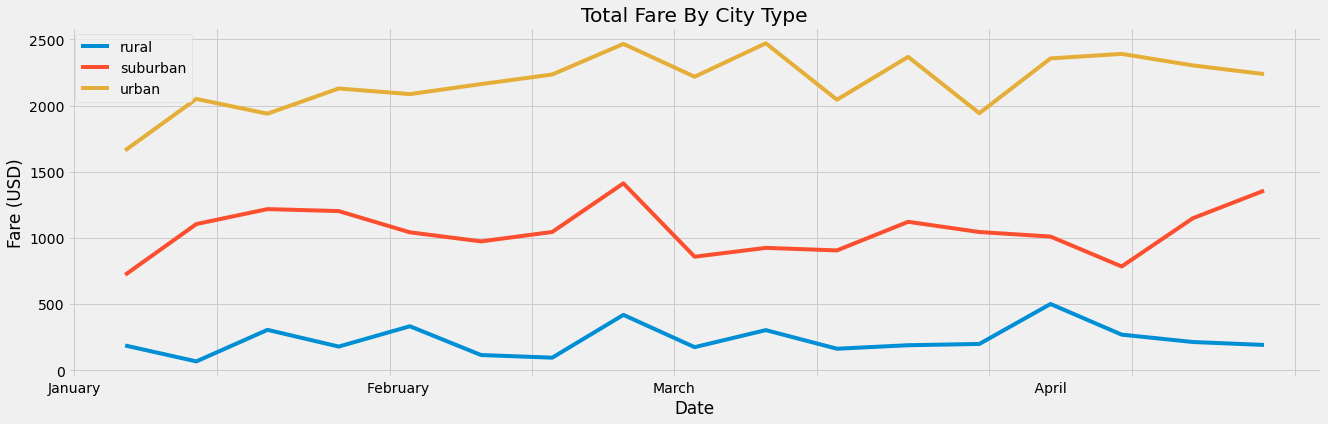

In [146]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')


fig, ax = plt.subplots(figsize=(20, 6))

ax.plot(dates,rural_data, label="rural")
ax.plot(dates,suburban_data, label="suburban")
ax.plot(dates, urban_data, label="urban")

ax.set_title('Total Fare By City Type')
ax.set_ylabel('Fare (USD)')
ax.set_xlabel("Date")
#ax.set_xticks([2,4,6,8,10])
ax.set_xticklabels(["January","", "    February","", "March","", "                           April"])
ax.legend()



# Save the figure.
plt.savefig("analysis/Fig9.png")
plt.show()